In [1]:
import os
import numpy as np
import pandas as pd
import glob
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import image
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [3]:
May_dir = '/mnt/c/Users/since/Desktop/KdramaMay/'
beta_dir1 = os.path.join(May_dir, 'GLM', 'event_model', 'betas')
beta_dir2 = os.path.join(May_dir, 'GLM', 'detail_model', 'betas')
beta_dir3 = os.path.join(May_dir, 'GLM', 'event_detail_model', 'betas')

In [219]:
# Check subjects & conditions 
sub_sm = np.arange(1,34)
sub_sm_exclude = [0, 8, 25] #exclude 1, 9 & 26
subjects1 = np.delete(sub_sm, sub_sm_exclude)

sub_sm2 = np.arange(34,77)
sub_sm_exclude2 = [2, 3, 7, 13, 16, 22, 23, 26, 27,28,29,35] #Excluede 36, 37, 41, 47, 56, 57, 59, 60, 61,62,63,69
subjects2 = np.delete(sub_sm2, sub_sm_exclude2)

subjects = np.concatenate([subjects1, subjects2])
print(len(subjects),subjects)

#conditions1 = ['blind0', 'blind1', 'blind2', 'blind3', 'blind4', 'dream0','dream1', 'dream2', 'dream3', 'nei0', 'nei1', 'nei2', 'nei3','nei4', 'nei5', 'run0', 'run1', 'run2', 'run3', 'run4']
#conditions2 = ['first_vis', 'first_aud', 'second_vis', 'second_aud'] 
#conditions3 = ['vis', 'aud','blind0', 'blind1', 'blind2', 'blind3', 'blind4', 'dream0','dream1', 'dream2', 'dream3', 'nei0', 'nei1', 'nei2', 'nei3','nei4', 'nei5', 'run0', 'run1', 'run2', 'run3', 'run4']

61 [ 2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 27
 28 29 30 31 32 33 34 35 38 39 40 42 43 44 45 46 48 49 51 52 53 54 55 58
 59 64 65 66 67 68 70 71 72 73 74 75 76]


# Extraction Masks 

In [3]:
from nltools.data import Brain_Data, Adjacency
from nltools.mask import expand_mask, roi_to_brain

In [4]:
#Extracting signals on a parcellation
from nilearn.maskers import NiftiLabelsMasker
mask_dir = '/mnt/c/Users/since/Desktop/KdramaMay/analysis/roi_masks/BN_atlas_sub_hipp/DMN_HIPP_mask.nii.gz'
#masker = NiftiLabelsMasker(labels_img=mask_dir, standardize=True)

/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/image/resampling.py:616: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


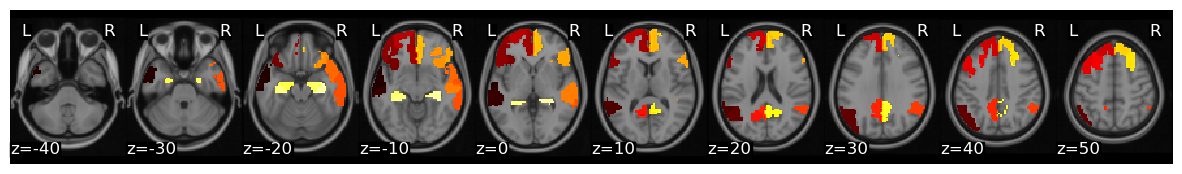

In [ ]:
#Load brain mask
mask = Brain_Data(mask_dir)
mask_x = expand_mask(mask)

mask.plot()

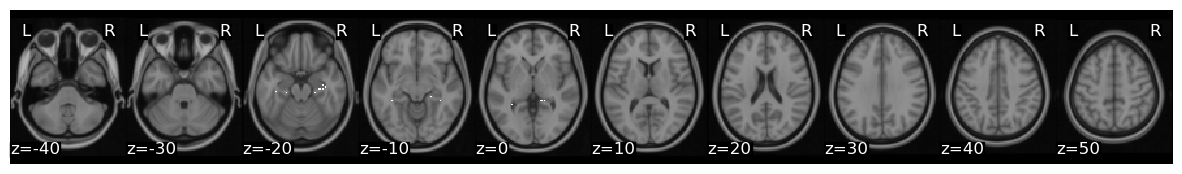

In [12]:
# 25 -AHC_LH; 26 - AHC_RH; 27-PHC_LH; 28-PHC_RH
roi = 28
mask_x[roi].plot()

## Make average activities for ROIs 

In [76]:
conditions2 = ['first_vis', 'first_aud', 'second_vis', 'second_aud'] 
data_dir = os.path.join(May_dir, 'GLM', 'detail_model', 'betas')

sub_rois = {}
for sub in subjects1:
    for cond in conditions2: 
        file_list = os.path.join(data_dir, f"sub-{sub}_task-encoding_betas_{cond}_image.nii.gz")
        data = Brain_Data(file_list)
        roi = data.extract_roi(mask)
        pd.DataFrame(roi.T).to_csv(os.path.join(data_dir, 'masked', f"sub-{sub}_task-{cond}_Average_ROI_BN_n28.csv" ), index=False)
    sub_rois[sub] = pd.DataFrame(roi.T)

/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

### overfitted_Event_detail_model

In [349]:
conditions2 = ['vis', 'aud'] 
data_dir = os.path.join(May_dir, 'GLM', 'overfitEvent_detail_model')

for sub in subjects:
    print(sub)
    for run in [1,2]:
        for cond in conditions2: 
            file_list = glob.glob(os.path.join(data_dir, 'betas', f"sub-{sub}_run-{run}_task-encoding_betas_{cond}*_image.nii.gz"))[0]
            data = Brain_Data(file_list)
            roi = data.extract_roi(mask)
            pd.DataFrame(roi.T).to_csv(os.path.join(data_dir, 'masked', f"sub-{sub}_task-{cond}{run}_Average_ROI_BN_n28.csv" ), index=False)

2


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

3


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

4


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

5


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

6


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

7


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

8


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

10


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

11


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

12


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

13


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

14


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

15


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

16


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

17


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

18


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

19


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

20


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

21


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

22


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

23


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

24


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

25


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

27


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

28


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

29


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

30


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

31


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

32


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

33


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

34


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

35


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

38


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

39


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

40


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

42


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

43


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

44


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

45


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

46


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

48


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

49


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

51


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

52


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

53


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

54


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

55


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

58


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

59


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

64


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

65


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

66


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

67


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

68


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

70


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

71


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

72


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

73


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

74


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

75


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

76


/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

### Event_detail_model

In [108]:
conditions2 = ['vis', 'aud'] 
data_dir = os.path.join(May_dir, 'GLM', 'event_detail_model', 'betas')

for sub in subjects1:
    for cond in conditions2: 
        for run in [1,2]: 
            file_list = os.path.join(data_dir, f"sub-{sub}_run-{run}_task-encoding_betas_{cond}_image.nii.gz")
            data = Brain_Data(file_list)
            roi = data.extract_roi(mask)
            pd.DataFrame(roi.T).to_csv(os.path.join(data_dir, 'masked', f"sub-{sub}_task-{cond}{run}_Average_ROI_BN_n28.csv" ), index=False)

/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

In [109]:
conditions2 = ['vis', 'aud'] 
data_dir = os.path.join(May_dir, 'GLM', 'event_detail_model', 'betas')

for sub in subjects2:
    for cond in conditions2: 
        for run in [1,2]: 
            file_list = os.path.join(data_dir, f"sub-{sub}_run-{run}_task-encoding_betas_{cond}_image.nii.gz")
            data = Brain_Data(file_list)
            roi = data.extract_roi(mask)
            pd.DataFrame(roi.T).to_csv(os.path.join(data_dir, 'masked', f"sub-{sub}_task-{cond}{run}_Average_ROI_BN_n28.csv" ), index=False)

/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

### detail_model

In [11]:
conditions2 = ['first_vis', 'first_aud', 'second_vis', 'second_aud'] 
data_dir = os.path.join(May_dir, 'GLM', 'detail_model', 'betas')

for sub in subjects1:
    for cond in conditions2: 
        file_list = os.path.join(data_dir, f"sub-{sub}_task-encoding_betas_{cond}_image.nii.gz")
        data = Brain_Data(file_list)
        roi = data.extract_roi(mask)
        pd.DataFrame(roi.T).to_csv(os.path.join(data_dir, 'masked', f"sub-{sub}_task-{cond}_Average_ROI_BN_n28.csv" ), index=False)

/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

In [12]:
conditions2 = ['first_vis', 'first_aud', 'second_vis', 'second_aud'] 
data_dir = os.path.join(May_dir, 'GLM', 'detail_model', 'betas')

for sub in subjects2:
    for cond in conditions2: 
        file_list = os.path.join(data_dir, f"sub-{sub}_task-encoding_betas_{cond}_image.nii.gz")
        data = Brain_Data(file_list)
        roi = data.extract_roi(mask)
        pd.DataFrame(roi.T).to_csv(os.path.join(data_dir, 'masked', f"sub-{sub}_task-{cond}_Average_ROI_BN_n28.csv" ), index=False)

/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

# Load ROIs activities files : Detailed Model

## Event_detail model

In [62]:
conditions = ['vis1', 'vis2', 'aud1', 'aud2'] 
data_dir = os.path.join(May_dir, 'GLM', 'event_detail_model', 'betas')

sub_timeseries = {}
for sub in subjects:
    cond_timeseries = {}
    for cond in conditions: 
        file = pd.read_csv(os.path.join(data_dir, 'masked', f"sub-{sub}_task-{cond}_Average_ROI_BN_n28.csv" ))
        file.reset_index(inplace=True, drop=True)
        cond_timeseries[cond] = file
    sub_timeseries[sub] = cond_timeseries

In [63]:
# average across timeline within a subject
mean_roi1 = {}
mean_roi2 = {}
for roi in range(29):
    sub_roi1 = np.zeros((len(subjects1)+1,4))
    sub_roi2 = np.zeros((len(subjects2)+1,4))
    
    for i, sub in enumerate(subjects1):
        for num, cond in enumerate(conditions): 
            #print(num, cond)
            sub_roi1[i, num]  = sub_timeseries[sub][cond].iloc[roi]
            
    for i, sub in enumerate(subjects2):
        for num, cond in enumerate(conditions): 
            sub_roi2[i, num]  = sub_timeseries[sub][cond].iloc[roi]
        
    mean_roi1[roi] = sub_roi1.mean(axis=0)
    mean_roi2[roi] = sub_roi2.mean(axis=0)
            
# average across subjects 

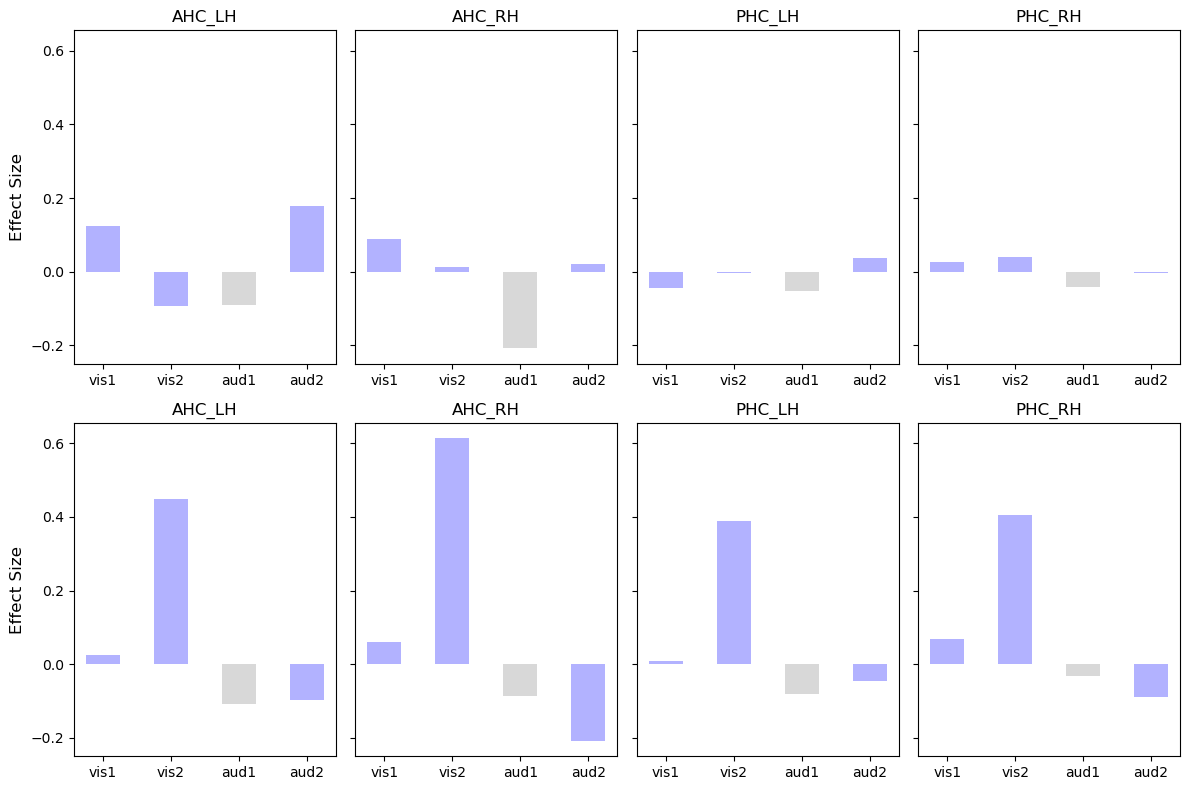

In [56]:
# Event_detail_model 
# ploting Effect sizes by regions & conditions
fig, axes = plt.subplots(2, 4, figsize = (12,8), sharey=True)   
roiName = {25: 'AHC_LH', 26: 'AHC_RH', 27: 'PHC_LH', 28: 'PHC_RH'} 
meanType = {1: mean_roi1, 2: mean_roi2}

for pos, roi in enumerate([25, 26, 27, 28]):
    for line, num in enumerate([1,2]):
        df = meanType[num][roi]
        axes[line,pos].bar(['vis1', 'vis2', 'aud1', 'aud2'] ,df, color = ['blue', 'blue', 'gray', 'blue'], alpha=0.3, width=0.5)
        axes[line, pos].set_title(f"{roiName[roi]}", fontsize = 12)
        axes[0, 0].set_ylabel("Effect Size", fontsize = 12)
        axes[1, 0].set_ylabel("Effect Size", fontsize = 12)

fig.tight_layout()
plt.show()

## Detail model

In [69]:
conditions2 = ['first_vis', 'first_aud', 'second_vis', 'second_aud'] 
data_dir = os.path.join(May_dir, 'GLM', 'detail_model', 'betas')

sub_timeseries = {}
for sub in subjects:
    cond_timeseries = {}
    for cond in conditions2: 
        file = pd.read_csv(os.path.join(data_dir, 'masked', f"sub-{sub}_task-{cond}_Average_ROI_BN_n28.csv" ))
        file.reset_index(inplace=True, drop=True)
        cond_timeseries[cond] = file
    sub_timeseries[sub] = cond_timeseries

In [95]:
# average across timeline within a subject
mean_roi1 = {}
mean_roi2 = {}
conditions2 = ['first_vis', 'second_vis', 'first_aud', 'second_aud'] 
for roi in np.arange(1,29):
#for roi in [25, 26, 27, 28]:
    sub_roi1 = np.zeros((len(subjects1)+1,4))
    sub_roi2 = np.zeros((len(subjects2)+1,4))
    roi_df1 = []
    roi_df2 = []
    
    for i, sub in enumerate(subjects1):
        for num, cond in enumerate(conditions2): 
            #print(num, cond)
            sub_roi1[i, num]  = sub_timeseries[sub][cond].iloc[roi]
            
    for i, sub in enumerate(subjects2):
        for num, cond in enumerate(conditions2): 
            sub_roi2[i, num]  = sub_timeseries[sub][cond].iloc[roi]
        
    mean_roi1[roi] = sub_roi1.mean(axis=0)
    mean_roi2[roi] = sub_roi2.mean(axis=0)
            
# average across subjects 

In [101]:
from sklearn.metrics.pairwise import cosine_similarity

# Extract arrays
array_list = list(mean_roi1.values())

# Calculate cosine similarity
similarity_matrix = cosine_similarity(array_list)

# Create a DataFrame for better visualization
similarity_df = pd.DataFrame(similarity_matrix, index=mean_roi1.keys(), columns=mean_roi1.keys())

similarity_df

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
1,1.000000,0.683252,0.374838,0.971155,0.925814,-0.263531,-0.616376,0.984856,0.779606,0.291214,...,-0.258919,0.549714,-0.121404,0.713149,0.094678,0.014468,0.272304,0.933654,0.734747,0.617160
2,0.683252,1.000000,-0.338840,0.669829,0.735127,-0.843206,-0.980106,0.697921,0.489381,-0.419190,...,-0.809060,-0.073586,-0.772983,0.420125,-0.623772,0.736696,0.877051,0.892342,0.982449,0.953393
3,0.374838,-0.338840,1.000000,0.296410,0.161775,0.717987,0.433314,0.312885,0.145338,0.763558,...,0.726089,0.940858,0.820380,0.495550,0.941326,-0.841313,-0.631688,0.087523,-0.270448,-0.486819
4,0.971155,0.669829,0.296410,1.000000,0.983133,-0.341137,-0.648983,0.996215,0.902934,0.371936,...,-0.360792,0.416974,-0.114300,0.761711,0.027068,0.043405,0.231353,0.916195,0.690356,0.662987
5,0.925814,0.735127,0.161775,0.983133,1.000000,-0.485197,-0.742873,0.976020,0.921610,0.300364,...,-0.508707,0.275151,-0.213464,0.779910,-0.117228,0.181709,0.323978,0.926581,0.725121,0.748777
6,-0.263531,-0.843206,0.717987,-0.341137,-0.485197,1.000000,0.917634,-0.345062,-0.349304,0.557725,...,0.992965,0.560816,0.869437,-0.209865,0.905291,-0.935543,-0.874711,-0.572576,-0.750048,-0.899335
7,-0.616376,-0.980106,0.433314,-0.648983,-0.742873,0.917634,1.000000,-0.664357,-0.546185,0.391059,...,0.900500,0.212797,0.784129,-0.433780,0.703596,-0.786298,-0.860153,-0.848534,-0.932402,-0.979115
8,0.984856,0.697921,0.312885,0.996215,0.976020,-0.345062,-0.664357,1.000000,0.863381,0.331912,...,-0.354539,0.454781,-0.132385,0.771770,0.029581,0.061379,0.271228,0.938934,0.721836,0.665948
9,0.779606,0.489381,0.145338,0.902934,0.921610,-0.349304,-0.546185,0.863381,1.000000,0.505539,...,-0.415774,0.143352,-0.040695,0.673675,-0.039524,0.009867,0.051910,0.715453,0.471523,0.604742
10,0.291214,-0.419190,0.763558,0.371936,0.300364,0.557725,0.391059,0.331912,0.505539,1.000000,...,0.489172,0.550430,0.840505,0.521754,0.769115,-0.810140,-0.795336,0.002527,-0.412964,-0.372159


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def find_similar_pairs(df, threshold=0.7):
    # Extract arrays and corresponding keys
    array_list = list(df.values())
    keys = list(df.keys())
    
    # Calculate cosine similarity
    similarity_matrix = cosine_similarity(array_list)
    
    # Extract pairs with similarity greater than the threshold
    similar_pairs = []
    for i in range(len(keys)):
        for j in range(i+1, len(keys)):
            if similarity_matrix[i, j] > threshold:
                similar_pairs.append((keys[i], keys[j], similarity_matrix[i, j]))
    
    return similar_pairs


In [109]:
df = find_similar_pairs(mean_roi2, threshold=0.7)
df

[(1, 2, 0.9884893340922593),
 (1, 4, 0.7759064930072143),
 (1, 5, 0.7482383010213909),
 (1, 8, 0.8911543811508349),
 (1, 15, 0.8879577193619452),
 (1, 16, 0.8888258666173363),
 (1, 20, 0.8853793505605969),
 (2, 4, 0.7658377282155541),
 (2, 5, 0.730003452104753),
 (2, 8, 0.8314995402958197),
 (2, 15, 0.935154859342594),
 (2, 16, 0.9414618058685092),
 (2, 20, 0.9454928592136949),
 (3, 6, 0.8724339136310642),
 (3, 7, 0.874166495421305),
 (3, 10, 0.9137627293467232),
 (3, 11, 0.9638218585083672),
 (3, 12, 0.9132380687549359),
 (3, 13, 0.8609068111001927),
 (3, 19, 0.8435392690649437),
 (3, 21, 0.9491596951188984),
 (3, 22, 0.9670036348861201),
 (3, 23, 0.8744212784105655),
 (3, 27, 0.8705127871524306),
 (4, 5, 0.9539296439379514),
 (4, 8, 0.881706563808845),
 (5, 8, 0.8938649849067071),
 (6, 10, 0.7324991593475051),
 (6, 11, 0.8070801714684253),
 (6, 12, 0.8247155501773643),
 (6, 19, 0.8487609527175908),
 (6, 22, 0.7962009869440821),
 (6, 23, 0.8637306664068052),
 (6, 26, 0.791605747229263

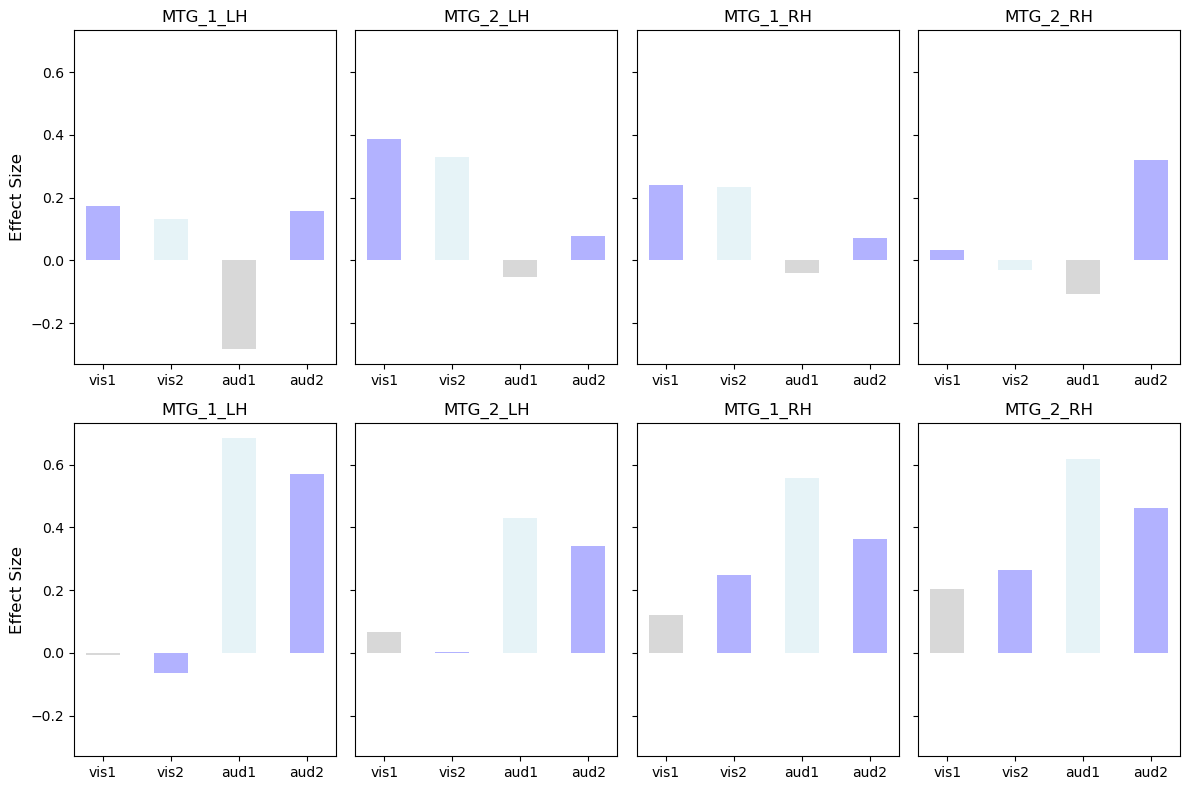

In [107]:
# ploting Effect sizes by regions & conditions
#fig, axes = plt.subplots(2, 2, figsize = (10,6), sharey=True)   
roiName = {25: 'AHC_LH', 26: 'AHC_RH', 27: 'PHC_LH', 28: 'PHC_RH'} 
meanType = {1: mean_roi1, 2: mean_roi2}

# # for pos, roi in enumerate([25, 26, 27, 28]):
# df1 = mean_roi1[25]+mean_roi1[26]
# df3 = mean_roi2[25]+mean_roi2[26]
# df2 = mean_roi1[27]+mean_roi1[28]
# df4 = mean_roi2[27]+mean_roi2[28]

# axes[0, 0].bar(['vis1', 'vis2', 'aud1', 'aud2'] ,df1, color = ['blue', 'blue', 'gray', 'blue'], alpha=0.3, width=0.5)
# axes[0, 1].bar(['vis1', 'vis2', 'aud1', 'aud2'] ,df2, color = ['blue', 'blue', 'gray', 'blue'], alpha=0.3, width=0.5)
# axes[1, 0].bar(['vis1', 'vis2', 'aud1', 'aud2'] ,df3, color = ['gray', 'blue', 'blue', 'blue'], alpha=0.3, width=0.5)
# axes[1, 1].bar(['vis1', 'vis2', 'aud1', 'aud2'] ,df4, color = ['gray', 'blue', 'blue', 'blue'], alpha=0.3, width=0.5)
# axes[0, 0].set_title(f"AHC", fontsize = 12)
# axes[0, 1].set_title(f"PHC", fontsize = 12)
# axes[0, 0].set_ylabel("Effect Size", fontsize = 12)
# axes[1, 0].set_ylabel("Effect Size", fontsize = 12)

# fig.tight_layout()
# plt.show()

# ploting Effect sizes by regions & conditions
fig, axes = plt.subplots(2, 4, figsize = (12,8), sharey=True)   

roiName = {1: 'MTG_1_LH',2: 'MTG_2_LH', 3: 'MTG_3_LH', 4: 'AG_LH', 5 : 'IFG_1_LH', 6: 'IFG_2_LH', 7: 'VMPFC_LH',
           8: 'IFG_3_LH', 9: 'DMPFC_LH', 10: 'SFG_1_LH', 11: 'SFG_2_LH', 12: 'RSC_LH', 13: 'PMC_LH', 14: 'AG_RH',
           15: 'MTG_1_RH', 16: 'MTG_2_RH', 17: 'MTG_3_RH', 18: 'IFG_1_RH', 19: 'IFG_2_RH', 20: 'VMPFC_RH', 21: 'DMPFC_RH', 
           22: 'SFG_1_RH', 23: 'RSC_RH', 24: 'PMC_RH', 25: 'AHC_LH', 26: 'AHC_RH', 27: 'PHC_LH', 28: 'PHC_RH'} 
colors = {1: ['blue', 'lightblue', 'gray', 'blue'], 2: ['gray', 'blue', 'lightblue','blue']}
meanType = {1: mean_roi1, 2: mean_roi2}

for pos, roi in enumerate([1,2,15,16]):
    for line, num in enumerate([1,2]):
        df = meanType[num][roi]
        
        axes[line,pos].bar(['vis1', 'vis2', 'aud1', 'aud2'] ,df, color = colors[num], alpha=0.3, width=0.5)
        axes[line, pos].set_title(f"{roiName[roi]}", fontsize = 12)
        axes[0, 0].set_ylabel("Effect Size", fontsize = 12)
        axes[1, 0].set_ylabel("Effect Size", fontsize = 12)

fig.tight_layout()
plt.show()

## Contrast map 

In [ ]:
"C:\Users\since\Desktop\KdramaMay\GLM\detail_model\betas\sub-2_task-encoding_betas_first_aud_image.nii.gz"

In [221]:
conditions2 = ['first_vis', 'first_aud', 'second_vis', 'second_aud'] 
data_dir = os.path.join(May_dir, 'GLM', 'detail_model', 'betas')

for sub in subjects1:      
    file1 = os.path.join(data_dir, f"sub-{sub}_task-encoding_betas_first_vis_image.nii.gz")
    file2 = os.path.join(data_dir, f"sub-{sub}_task-encoding_betas_second_aud_image.nii.gz")
    data1 = Brain_Data(file1)
    data2 = Brain_Data(file2)
    data3 = data2 - data1
    roi = data3.extract_roi(mask)
    pd.DataFrame(roi.T).to_csv(os.path.join(data_dir, 'masked', f"sub-{sub}_task-contrast-aud2vis1_Average_ROI_BN_n28.csv"), index=False)
    
for sub in subjects2: 
    file1 = os.path.join(data_dir, f"sub-{sub}_task-encoding_betas_first_aud_image.nii.gz")
    file2 = os.path.join(data_dir, f"sub-{sub}_task-encoding_betas_second_vis_image.nii.gz")
    data1 = Brain_Data(file1)
    data2 = Brain_Data(file2)
    data3 = data2 - data1
    roi = data3.extract_roi(mask)
    pd.DataFrame(roi.T).to_csv(os.path.join(data_dir, 'masked', f"sub-{sub}_task-contrast-vis2aud1_Average_ROI_BN_n28.csv"), index=False)

/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/home/sincerely/.conda/envs/fmri01/lib/python3.7/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 6

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/since/Desktop/KdramaMay/GLM/detail_model/betas/masked/sub-2_task-contrast-*_Average_ROI_BN_n28.csv'

In [229]:
sub_timeseries = {}
for sub in subjects:
    file = pd.read_csv(glob.glob(os.path.join(data_dir, 'masked', f"sub-{sub}_task-contrast-*_Average_ROI_BN_n28.csv" ))[0])
    file.reset_index(inplace=True, drop=True)
    sub_timeseries[sub] = file

In [244]:
sub_timeseries[2].iloc[28]

0   -0.467616
Name: 28, dtype: float64

In [297]:
# average across timeline within a subject
#for roi in [25, 26, 27, 28]:
sub_roi3 = pd.DataFrame()
sub_roi4 = pd.DataFrame()
for sub in subjects1:
    sub_roi3[sub] = sub_timeseries[sub]

for sub in subjects2:
    sub_roi4[sub] = sub_timeseries[sub]

mean_roi3 = sub_roi3.mean(axis=1)
mean_roi4 = sub_roi4.mean(axis=1)
            
# average across subjects 

In [301]:
sub_roi3.shape

(31, 30)

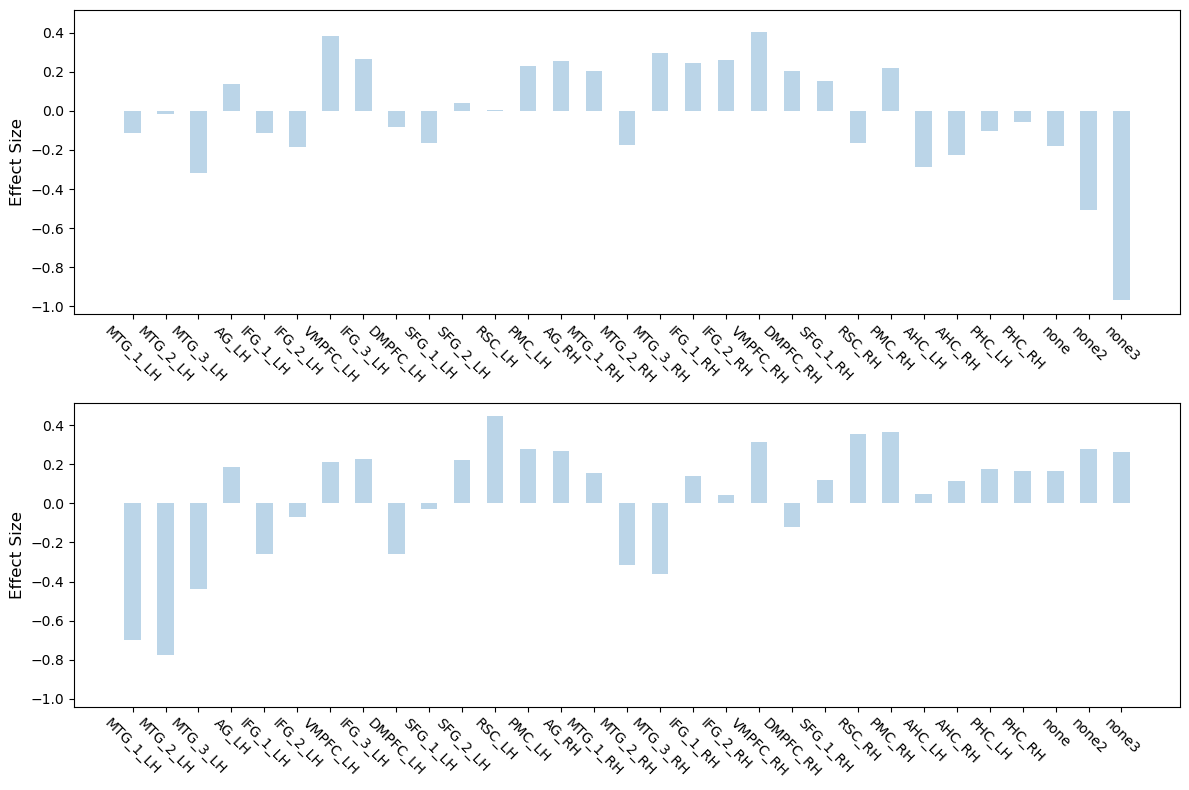

In [328]:
# ploting Effect sizes by regions & conditions
#fig, axes = plt.subplots(2, 2, figsize = (10,6), sharey=True)   
roiName = {25: 'AHC_LH', 26: 'AHC_RH', 27: 'PHC_LH', 28: 'PHC_RH'} 
meanType = {1: mean_roi1, 2: mean_roi2}

# # for pos, roi in enumerate([25, 26, 27, 28]):
# df1 = mean_roi1[25]+mean_roi1[26]
# df3 = mean_roi2[25]+mean_roi2[26]
# df2 = mean_roi1[27]+mean_roi1[28]
# df4 = mean_roi2[27]+mean_roi2[28]

# axes[0, 0].bar(['vis1', 'vis2', 'aud1', 'aud2'] ,df1, color = ['blue', 'blue', 'gray', 'blue'], alpha=0.3, width=0.5)
# axes[0, 1].bar(['vis1', 'vis2', 'aud1', 'aud2'] ,df2, color = ['blue', 'blue', 'gray', 'blue'], alpha=0.3, width=0.5)
# axes[1, 0].bar(['vis1', 'vis2', 'aud1', 'aud2'] ,df3, color = ['gray', 'blue', 'blue', 'blue'], alpha=0.3, width=0.5)
# axes[1, 1].bar(['vis1', 'vis2', 'aud1', 'aud2'] ,df4, color = ['gray', 'blue', 'blue', 'blue'], alpha=0.3, width=0.5)
# axes[0, 0].set_title(f"AHC", fontsize = 12)
# axes[0, 1].set_title(f"PHC", fontsize = 12)
# axes[0, 0].set_ylabel("Effect Size", fontsize = 12)
# axes[1, 0].set_ylabel("Effect Size", fontsize = 12)

# fig.tight_layout()
# plt.show()

# ploting Effect sizes by regions & conditions
fig, axes = plt.subplots(2, 1, figsize = (12,8), sharey=True)   

roiName = {1: 'MTG_1_LH',2: 'MTG_2_LH', 3: 'MTG_3_LH', 4: 'AG_LH', 5 : 'IFG_1_LH', 6: 'IFG_2_LH', 7: 'VMPFC_LH',
           8: 'IFG_3_LH', 9: 'DMPFC_LH', 10: 'SFG_1_LH', 11: 'SFG_2_LH', 12: 'RSC_LH', 13: 'PMC_LH', 14: 'AG_RH',
           15: 'MTG_1_RH', 16: 'MTG_2_RH', 17: 'MTG_3_RH', 18: 'IFG_1_RH', 19: 'IFG_2_RH', 20: 'VMPFC_RH', 21: 'DMPFC_RH', 
           22: 'SFG_1_RH', 23: 'RSC_RH', 24: 'PMC_RH', 25: 'AHC_LH', 26: 'AHC_RH', 27: 'PHC_LH', 28: 'PHC_RH', 29:'none', 30:'none2',31:'none3'} 
meanType = {1: mean_roi3, 2: mean_roi4}

for line, num in enumerate([1,2]):
    df = meanType[num]
    xs = roiName.values()
    axes[line].bar(xs , df.values, alpha=0.3, width=0.5)
    axes[0].set_ylabel("Effect Size", fontsize = 12)
    axes[1].set_ylabel("Effect Size", fontsize = 12)
    axes[line].tick_params(axis='x', rotation=-45)

fig.tight_layout()
plt.show()

In [326]:
corr = pearsonr(mean_roi3, mean_roi4)
corr[0]

0.11367859860550505

In [ ]:
# extract time-series of each roi 
from nltools.data import Brain_Data, Design_Matrix, Adjacency
from nltools.mask import expand_mask, roi_to_brain
from sklearn.metrics import pairwise_distances

rois = smoothed_denoised.extract_roi(mask=mask)
roi_corr = 1 - pairwise_distances(rois, metric='correlation')
sns.heatmap(roi_corr, square=True, vmin=-1, vmax=1, cmap='RdBu_r')


In [ ]:
a = Adjacency(roi_corr, matrix_type='similarity', labels=[x for x in range(50)])
a_thresholded = a.threshold(upper=.6, binarize=True)

a_thresholded.plot()

In [ ]:
plt.figure(figsize=(20,15))
G = a_thresholded.to_graph()
pos = nx.kamada_kawai_layout(G)
node_and_degree = G.degree()
nx.draw_networkx_edges(G, pos, width=3, alpha=.2)
nx.draw_networkx_labels(G, pos, font_size=14, font_color='darkslategray')

nx.draw_networkx_nodes(G, pos, nodelist=list(dict(node_and_degree).keys()),
                       node_size=[x[1]*100 for x in node_and_degree],
                       node_color=list(dict(node_and_degree).values()),
                       cmap=plt.cm.Reds_r, linewidths=2, edgecolors='darkslategray', alpha=1)

# Compare Models

In [351]:
May_dir = '/mnt/c/Users/since/Desktop/KdramaMay/'
detail_dir = os.path.join(May_dir, 'GLM', 'detail_model', 'betas')
event_detail_dir = os.path.join(May_dir, 'GLM', 'event_detail_model', 'betas')
overfit_event_detail_dir = os.path.join(May_dir, 'GLM', 'overfitEvent_detail_model')



detail_conditions = ['first_vis', 'second_vis', 'first_aud', 'second_aud'] 
mapping_cond = {'vis1' : 'first_vis', 'vis2': 'second_vis', 'aud1': 'first_aud', 'aud2':'second_aud'}
event_detail_conditions = ['vis1', 'vis2', 'aud1', 'aud2']


detail_timeseries = {}
for sub in subjects:
    cond_timeseries = {}
    for cond in detail_conditions: 
        file = pd.read_csv(os.path.join(detail_dir, 'masked', f"sub-{sub}_task-{cond}_Average_ROI_BN_n28.csv" ))
        file.reset_index(inplace=True, drop=True)
        cond_timeseries[cond] = file
    detail_timeseries[sub] = cond_timeseries

# event_detail_timeseries = {}
# for sub in subjects:
#     cond_timeseries = {}
#     for cond in event_detail_conditions: 
#         file = pd.read_csv(os.path.join(event_detail_dir, 'masked', f"sub-{sub}_task-{cond}_Average_ROI_BN_n28.csv" ))
#         file.reset_index(inplace=True, drop=True)
#         cond_timeseries[mapping_cond[cond]] = file
#     event_detail_timeseries[sub] = cond_timeseries
    
overfit_event_detail_timeseries = {} 
for sub in subjects:
    cond_timeseries = {}
    for cond in event_detail_conditions: 
        file = pd.read_csv(os.path.join(overfit_event_detail_dir, 'masked', f"sub-{sub}_task-{cond}_Average_ROI_BN_n28.csv" ))
        file.reset_index(inplace=True, drop=True)
        cond_timeseries[mapping_cond[cond]] = file
    overfit_event_detail_timeseries[sub] = cond_timeseries

In [361]:
import os
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
from statsmodels.tools.eval_measures import aic, bic

# Define the directories and conditions
detail_dir = os.path.join(May_dir, 'GLM', 'detail_model', 'betas')
event_detail_dir = os.path.join(May_dir, 'GLM', 'event_detail_model', 'betas')
detail_conditions = ['first_vis', 'second_vis', 'first_aud', 'second_aud'] 
mapping_cond = {'vis1': 'first_vis', 'vis2': 'second_vis', 'aud1': 'first_aud', 'aud2': 'second_aud'}
event_detail_conditions = ['vis1', 'vis2', 'aud1', 'aud2']

# Function to load and combine data
for sub in subjects:
    for cond in detail_conditions: 
        detail_file = pd.DataFrame()
        detail_file['beta'] = pd.read_csv(os.path.join(detail_dir, 'masked', f"sub-{sub}_task-{cond}_Average_ROI_BN_n28.csv"))
        detail_file['condition'] = cond
        detail_file['source'] = 'detail'
        detail_file['SubjectID'] = sub
    # Load event_detail_timeseries data
    for cond in event_detail_conditions: 
        event_detail_file = pd.DataFrame()
        event_detail_file['beta'] = pd.read_csv(os.path.join(event_detail_dir, 'masked', f"sub-{sub}_task-{cond}_Average_ROI_BN_n28.csv"))
        event_detail_file['condition'] = mapping_cond[cond]
        event_detail_file['source'] = 'event_detail'
        event_detail_file['SubjectID'] = sub
        
    for cond in event_detail_conditions: 
        overfit_event_file = pd.DataFrame()
        overfit_event_file['beta'] = pd.read_csv(os.path.join(overfit_event_detail_dir, 'masked', f"sub-{sub}_task-{cond}_Average_ROI_BN_n28.csv"))
        overfit_event_file['condition'] = mapping_cond[cond]
        overfit_event_file['source'] = 'event_detail'
        overfit_event_file['SubjectID'] = sub
        
#         for cond in event_detail_conditions: 
#         event_file = pd.DataFrame()
#         event_file['beta'] = pd.read_csv(os.path.join(overfit_event_detail_dir, 'masked', f"sub-{sub}_task-{cond}_Average_ROI_BN_n28.csv")).iloc[25:]
#         event_file['condition'] = mapping_cond[cond]
#         event_file['source'] = 'event_detail'
#         event_file['SubjectID'] = sub

def fit_model_and_get_aic(df):
    formula = "beta ~ condition"
    model = ols(formula, data=df).fit()
    return model.aic, model.bic

In [363]:

# Fit the models and get AIC values
detail_aic, bic = fit_model_and_get_aic(detail_file)
event_detail_aic, evnet_bic = fit_model_and_get_aic(event_detail_file)
overfit_event_detail_aic, overfit_evnet_bic = fit_model_and_get_aic(overfit_event_file)


# Print the AIC values
print(f"Detail model AIC: {detail_aic}, {bic}")
print(f"Event detail model AIC: {event_detail_aic}, {evnet_bic}")
print(f"Overfit Event detail model AIC: {overfit_event_detail_aic}, {overfit_evnet_bic}")

Detail model AIC: 27.506622707700423, 28.940609912185568
Event detail model AIC: 67.21375266612094, 68.64773987060609
Overfit Event detail model AIC: 65.54114529683048, 66.97513250131563


# Compare with recall analysis

In [189]:
#Load module & set dir 
import numpy as np
import json
import csv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

overall_performance_dir = "/mnt/c/Users/since/Dropbox/RAs/projects"
rating_files = "Ratings/1.SubjectRating"

In [190]:
#Subject check 
sub_sm = np.arange(1,34)
sub_sm_exclude = [8, 25] #exclude 9 & 26
subjects1 = np.delete(sub_sm, sub_sm_exclude)

sub_sm2 = np.arange(34,77)
sub_sm_exclude2 = [2, 3, 7, 13, 22, 23, 26, 27,28,29,35] #Excluede 36, 37, 41, 47, 56, 57, 60, 61,62,63,69
subjects2 = np.delete(sub_sm2, sub_sm_exclude2)

# Set columns 
sub_idx, vis, aud, subj = [], [], [], []
for sub in subjects1:
    
    if sub < 10:
        aud_idx = 'A0'+str(sub)
        vis_idx = 'V0'+str(sub)
        subj_idx = 'S0'+str(sub)
    else:
        aud_idx = 'A'+str(sub)
        vis_idx = 'V'+str(sub)
        subj_idx = 'S'+str(sub)
        
    sub_idx.append(vis_idx)
    sub_idx.append(aud_idx)
    vis.append(vis_idx)
    aud.append(aud_idx)
    subj.append(subj_idx)
    #aud.append(aud_idx)
    

sub_idx2, vis2, aud2, subj2 = [], [], [], []
for sub in subjects2:
    
    if sub < 10:
        aud_idx = 'A0'+str(sub)
        vis_idx = 'V0'+str(sub)
        subj_idx = 'S0'+str(sub)
    else:
        aud_idx = 'A'+str(sub)
        vis_idx = 'V'+str(sub)
        subj_idx = 'S'+str(sub)
        
    sub_idx2.append(vis_idx)
    sub_idx2.append(aud_idx)
    vis2.append(vis_idx)
    aud2.append(aud_idx)
    subj2.append(subj_idx)
print(subj)

['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32', 'S33']


In [194]:
#Load files 
rating_files = "Ratings/2.EventRating"
fpath = os.path.join(overall_performance_dir, 'KiKang' , rating_files)
print(fpath)
fname1 = 'Event_counting_KK1' +'.xlsx'
fname2 = 'Event_counting_KK2' +'.xlsx'


#sub-01~33
use_cols1 = np.arange(3,65)
use_cols2 = np.arange(3,67)

run = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'RunningMan',usecols = use_cols1, names = sub_idx)[0:13]
run2 = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'RunningMan2',usecols = use_cols1, names = sub_idx)[0:13]
run3 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'RunningMan',usecols = use_cols2, names = sub_idx2)[0:13]
run4 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'RunningMan2',usecols = use_cols2, names = sub_idx2)[0:13]

nei = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'Neigobors',usecols = use_cols1, names = sub_idx)[0:13]
nei2 = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'Neighbors2',usecols = use_cols1, names = sub_idx)[0:13]
nei3 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'Neigobors',usecols = use_cols2, names = sub_idx2)[0:13]
nei4 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'Neighbors2',usecols = use_cols2, names = sub_idx2)[0:13]

dre = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'Dream',usecols = use_cols1, names = sub_idx)[0:12]
dre2 = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'Dream2',usecols = use_cols1, names = sub_idx)[0:12]
dre3 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'Dream',usecols = use_cols2, names = sub_idx2)[0:12]
dre4 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'Dream2',usecols = use_cols2, names = sub_idx2)[0:12]


bli = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'BlindDate',usecols = use_cols1, names = sub_idx)[0:13]
bli2 = pd.read_excel(os.path.join(fpath, fname1), sheet_name = 'BlindDate2',usecols = use_cols1, names = sub_idx)[0:13]
bli3 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'BlindDate',usecols = use_cols2, names = sub_idx2)[0:13]
bli4 = pd.read_excel(os.path.join(fpath, fname2), sheet_name = 'BlindDate2',usecols = use_cols2, names = sub_idx2)[0:13]


#df NAN to Zero 
nei3 = nei3.fillna(0)
dre = dre.fillna(0)
dre2 = dre2.fillna(0)
dre3 = dre3.fillna(0)
dre4 = dre4.fillna(0)
bli3 = bli3.fillna(0)
bli4 = bli4.fillna(0)


overall1 = {'RunningMan' : run, 'Neighbors':nei, 'Dream': dre, 'BlindDate':bli}
overall2 = {'RunningMan' : run2, 'Neighbors':nei2, 'Dream': dre2, 'BlindDate':bli2}
overall3 = {'RunningMan' : run3, 'Neighbors':nei3, 'Dream': dre3, 'BlindDate':bli3}
overall4 = {'RunningMan' : run4, 'Neighbors':nei4, 'Dream': dre4, 'BlindDate':bli4}
cond = {'first_vis': overall1, 'second_aud': overall2, 'first_aud': overall3, 'second_vis': overall4} 

/mnt/c/Users/since/Dropbox/RAs/projects/KiKang/Ratings/2.EventRating


In [139]:
VA_first_vis, VA_second_vis, VA_first_aud, VA_second_aud, VA_change_vis, VA_change_aud, VA_avg_change_vis, VA_avg_change_aud = {}, {}, {}, {}, {}, {}, {}, {}
VA_relative_change, VA_relative_change_mean = {}, []
VA_aud_change_mean, VA_vis_change_mean = [], []
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    print(story)
    VA_first_vis[story] = overall1[story][vis]
    VA_second_vis[story] = overall2[story][vis]

    VA_first_aud[story] = overall1[story][aud]
    VA_second_aud[story] = overall2[story][aud]

    VA_change_vis[story] = VA_second_vis[story]-VA_first_vis[story]
    VA_change_aud[story] = VA_second_aud[story]-VA_first_aud[story]

    VA_avg_change_vis[story] = VA_change_vis[story].mean(axis = 1)
    VA_avg_change_aud[story] = VA_change_aud[story].mean(axis = 1)
    
    VA_relative_change[story] = VA_change_aud[story] - VA_change_vis[story]
    VA_relative_change_mean.append((VA_avg_change_aud[story] - VA_avg_change_vis[story]).mean())
    VA_aud_change_mean.append(VA_avg_change_aud[story].mean())
    VA_vis_change_mean.append(VA_avg_change_vis[story].mean())
    
AV_first_aud, AV_second_aud, AV_first_vis, AV_second_vis, AV_change_vis, AV_change_aud, AV_avg_change_vis, AV_avg_change_aud = {}, {}, {}, {}, {}, {}, {}, {}
AV_relative_change, AV_relative_change_mean = {}, []
AV_aud_change_mean, AV_vis_change_mean = [], []
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    print(story)
    AV_first_aud[story] = overall3[story][aud2]
    AV_second_aud[story] = overall4[story][aud2]

    AV_first_vis[story] = overall3[story][vis2]
    AV_second_vis[story] = overall4[story][vis2]

    AV_change_vis[story] = AV_second_vis[story]-AV_first_vis[story]
    AV_change_aud[story] = AV_second_aud[story]-AV_first_aud[story]

    AV_avg_change_vis[story] = AV_change_vis[story].mean(axis = 1)
    AV_avg_change_aud[story] = AV_change_aud[story].mean(axis = 1)
    
    AV_relative_change[story] = AV_change_vis[story] -  AV_change_aud[story]
    AV_relative_change_mean.append((AV_avg_change_vis[story]- AV_avg_change_aud[story]).mean())
    AV_aud_change_mean.append(AV_avg_change_aud[story].mean())
    AV_vis_change_mean.append(AV_avg_change_vis[story].mean())

RunningMan
Neighbors
Dream
BlindDate
RunningMan
Neighbors
Dream
BlindDate


In [208]:
VA_first_vis, VA_second_vis, VA_first_aud, VA_second_aud, VA_change_vis, VA_change_aud, VA_avg_change_vis, VA_avg_change_aud = {}, {}, {}, {}, {}, {}, {}, {}
VA_First_score, VA_second_score =[], []
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    print(story)
    VA_first_vis[story] = overall1[story][vis]
    VA_second_vis[story] = overall2[story][vis]

    VA_first_aud[story] = overall1[story][aud]
    VA_second_aud[story] = overall2[story][aud]
    
    VA_First_score.append((VA_first_vis[story].mean(axis=1) + VA_first_aud[story].mean(axis=1)).mean())
    VA_second_score.append((VA_second_vis[story].mean(axis=1) + VA_second_aud[story].mean(axis=1)).mean())
    
AV_first_aud, AV_second_aud, AV_first_vis, AV_second_vis, AV_change_vis, AV_change_aud, AV_avg_change_vis, AV_avg_change_aud = {}, {}, {}, {}, {}, {}, {}, {}
AV_First_score, AV_second_score =[], []
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    print(story)
    AV_first_aud[story] = overall3[story][aud2]
    AV_second_aud[story] = overall4[story][aud2]

    AV_first_vis[story] = overall3[story][vis2]
    AV_second_vis[story] = overall4[story][vis2]

    AV_First_score.append((AV_first_vis[story].mean(axis=1) + AV_first_aud[story].mean(axis=1)).mean())
    AV_second_score.append((AV_second_aud[story].mean(axis=1) + AV_second_vis[story].mean(axis=1)).mean())

RunningMan
Neighbors
Dream
BlindDate
RunningMan
Neighbors
Dream
BlindDate


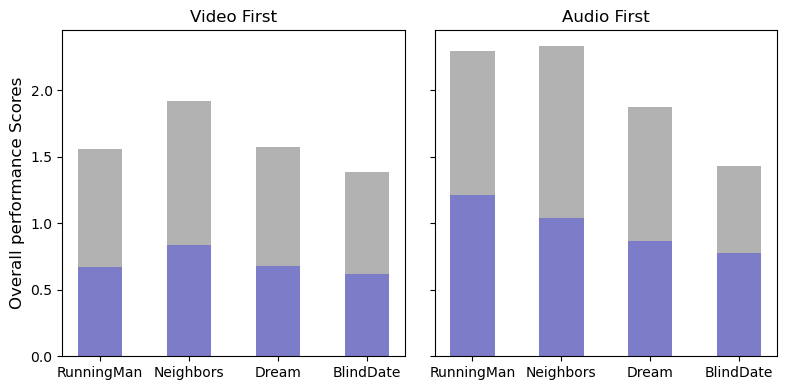

In [214]:
# ploting Effect sizes by regions & conditions
fig, axes = plt.subplots(1,2, figsize = (8,4), sharey=True)   
axes[1].bar(['RunningMan', 'Neighbors','Dream','BlindDate'] ,VA_second_score, color = 'black', alpha=0.3, width=0.5)
axes[1].bar(['RunningMan', 'Neighbors','Dream','BlindDate'] ,VA_First_score, color = 'blue', alpha=0.3, width=0.5)



axes[0].bar(['RunningMan', 'Neighbors','Dream','BlindDate'] ,AV_second_score, color = 'black',alpha=0.3, width=0.5)
axes[0].bar(['RunningMan', 'Neighbors','Dream','BlindDate'] ,AV_First_score, color = 'blue', alpha=0.3, width=0.5)


axes[1].set_title("Audio First", fontsize = 12)
axes[0].set_title("Video First", fontsize = 12)
axes[0].set_ylabel("Overall performance Scores", fontsize = 12)

fig.tight_layout()
plt.show()

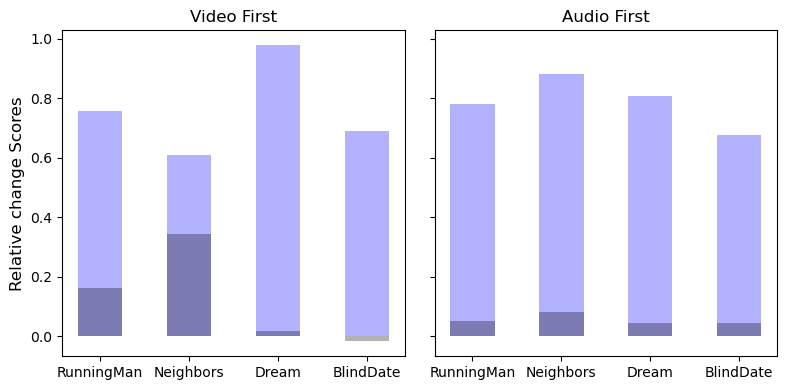

In [216]:
# ploting Effect sizes by regions & conditions
fig, axes = plt.subplots(1,2, figsize = (8,4), sharey=True)   
axes[1].bar(['RunningMan', 'Neighbors','Dream','BlindDate'] ,AV_relative_change_mean, color = 'blue', alpha=0.3, width=0.5)
#axes[1].bar(['RunningMan', 'Neighbors','Dream','BlindDate'] ,AV_vis_change_mean, color = 'blue',  alpha=0.3, width=0.5)
axes[1].bar(['RunningMan', 'Neighbors','Dream','BlindDate'] ,AV_aud_change_mean, color = 'black', alpha=0.3, width=0.5)



axes[0].bar(['RunningMan', 'Neighbors','Dream','BlindDate'] ,VA_relative_change_mean, color = 'blue', alpha=0.3, width=0.5)
#axes[0].bar(['RunningMan', 'Neighbors','Dream','BlindDate'] ,VA_aud_change_mean, color = 'blue', alpha=0.3, width=0.5)
axes[0].bar(['RunningMan', 'Neighbors','Dream','BlindDate'] ,VA_vis_change_mean, color = 'black',alpha=0.3, width=0.5)


axes[1].set_title("Audio First", fontsize = 12)
axes[0].set_title("Video First", fontsize = 12)
axes[0].set_ylabel("Relative change Scores", fontsize = 12)

fig.tight_layout()
plt.show()

## Get correlation between ROIs & recall score 


In [164]:
# Function to calculate Pearson correlation matrix
def calculate_correlation_matrix(behav_list, roi_list):
    n = len(roi_list)
    correlation_matrix = []
    for i in np.arange(1,n+1):
        #print(i)
        #print(behav_list, roi_list[i])
        corr = pearsonr(behav_list, roi_list[i])
        correlation_matrix.append(corr[0])
    return correlation_matrix

In [174]:
vis1, vis2, aud1, aud2 = [],[],[],[]
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    vis1.append(VA_first_vis[story].mean(axis=1).mean())
    vis2.append(VA_second_vis[story].mean(axis=1).mean())
    aud1.append(VA_first_aud[story].mean(axis=1).mean())
    aud2.append(VA_second_aud[story].mean(axis=1).mean())

VA_behav = [np.array(vis1).mean(), np.array(vis2).mean(), np.array(aud1).mean(), np.array(aud2).mean()]

vis1, vis2, aud1, aud2 = [],[],[],[]
for story in ['RunningMan', 'Neighbors','Dream','BlindDate']:
    vis1.append(AV_first_vis[story].mean(axis=1).mean())
    vis2.append(AV_second_vis[story].mean(axis=1).mean())
    aud1.append(AV_first_aud[story].mean(axis=1).mean())
    aud2.append(AV_second_aud[story].mean(axis=1).mean())

AV_behav = [np.array(vis1).mean(), np.array(vis2).mean(), np.array(aud1).mean(), np.array(aud2).mean()]

In [175]:
calculate_correlation_matrix(AV_behav, mean_roi1)

[-0.14348543012372678,
 -0.31182738202938654,
 -0.2316803014312255,
 -0.18450737731534392,
 -0.2690445523680814,
 0.3231964574244859,
 0.3384888817438817,
 -0.21462793241212458,
 -0.11950942757283733,
 -0.28232776103159996,
 -0.49199851738150313,
 0.3191922848729697,
 -0.04166336859557743,
 0.23107872193998236,
 -0.2064912909408327,
 0.015337467206359062,
 0.3720075044455683,
 -0.12685844636155796,
 0.27250891811824096,
 -0.18510992888504135,
 -0.19984110626111376,
 -0.7485360424990193,
 -0.015206710260838363,
 -0.21384638386215388,
 -0.31900446609641187,
 -0.3033156428334056,
 -0.12345537608889125,
 -0.1052648437516295]

In [166]:
calculate_correlation_matrix(AV_relative_change_mean, mean_roi2)

[-0.5588440185224923,
 -0.5455796507604722,
 0.7507017287619961,
 -0.9103115839121407,
 -0.9914138342744028,
 0.7894079455835545,
 0.29541637701384643,
 -0.8141101593005662,
 -0.7343409200567337,
 0.37905672132652013,
 0.53633616981021,
 0.6576595564290078,
 0.4483407694114605,
 0.6877669257325599,
 -0.12080544006423688,
 -0.2921598255157002,
 0.7000405159630012,
 0.40821983625308494,
 0.6734529579628332,
 -0.44445791728817374,
 0.5621293501608581,
 0.5331077217449742,
 0.7454801051237643,
 -0.15306469827006136,
 0.4514598480084263,
 0.7336247617591332,
 0.5532866992103351,
 0.4345281693067216]